In [1]:
key='80b7dbeb6a578d537948fc23d052750a'
targetDt='20211013'
url=f'http://www.kobis.or.kr/kobisopenapi/webservice/rest/boxoffice/searchDailyBoxOfficeList.json?key={key}&targetDt={targetDt}'
url

'http://www.kobis.or.kr/kobisopenapi/webservice/rest/boxoffice/searchDailyBoxOfficeList.json?key=80b7dbeb6a578d537948fc23d052750a&targetDt=20211013'

In [8]:
from urllib import request
import json,time,datetime
import pandas as pd

In [9]:
res = request.urlopen(url)
result = res.read()
result = json.loads(result)
result = result['boxOfficeResult']['dailyBoxOfficeList']
pd.DataFrame(result)

,rnum,rank,rankInten,rankOldAndNew,movieCd,movieNm,openDt,salesAmt,salesShare,salesInten,salesChange,salesAcc,audiCnt,audiInten,audiChange,audiAcc,scrnCnt,showCnt
0,1,1,0,NEW,20218052,베놈 2: 렛 데어 비 카니지,2021-10-13,1958115580,89.2,1958115580,100,1971225580,203258,203258,100,204132,1776,9236
1,2,2,-1,OLD,20191061,007 노 타임 투 다이,2021-09-29,89881100,4.1,-75806410,-45.8,10520731500,9808,-7657,-43.8,1076009,715,1748
2,3,3,-1,OLD,20190815,보이스,2021-09-15,48954350,2.2,-27771100,-36.2,12952495690,5274,-2926,-35.7,1311915,543,1324
3,4,4,-1,OLD,20200474,기적,2021-09-15,29512220,1.3,-11708860,-28.4,5964826600,3518,-1106,-23.9,633549,443,772
4,5,5,33,OLD,20218789,피어썸,2021-10-07,9351000,0.4,8921000,2074.7,15848800,1857,1807,3614,2515,45,47
5,6,6,3,OLD,20219826,용과 주근깨 공주,2021-09-29,6594900,0.3,-2743400,-29.4,518127400,661,-284,-30.1,53286,88,159
6,7,7,6,OLD,20210242,쁘띠 마망,2021-10-07,5843400,0.3,996660,20.6,96403770,615,42,7.3,10481,61,98
7,8,8,-2,OLD,20210142,스틸워터,2021-10-06,3179040,0.1,-8746460,-73.3,156074430,501,-1220,-70.9,17640,54,62
8,9,9,-2,OLD,20204117,모가디슈,2021-07-28,4332050,0.2,-4989230,-53.5,34464899000,434,-644,-59.7,3601768,92,122
9,10,10,0,NEW,20010007,고양이를 부탁해,2001-10-12,3535070,0.2,3535070,100,5448070,389,389,100,655,51,75


In [16]:
time.localtime()

time.struct_time(tm_year=2021, tm_mon=10, tm_mday=14, tm_hour=15, tm_min=7, tm_sec=6, tm_wday=3, tm_yday=287, tm_isdst=0)

In [26]:
str_date = time.strftime('%Y%m%d',time.localtime())
str_date

'20211014'

In [20]:
time_date = datetime.datetime.strptime(str_date,'%Y%m%d')
time_date

datetime.datetime(2021, 10, 14, 0, 0)

In [22]:
time_date1=time_date-datetime.timedelta(days=1)

In [24]:
str_date = time_date1.strftime('%Y%m%d')
str_date

'20211013'

In [61]:
def BoxOffice(day=30):
    key='80b7dbeb6a578d537948fc23d052750a'
    targetDt = time.strftime('%Y%m%d',time.localtime())
    cine=[]
    for i in range(day):
        time_date = datetime.datetime.strptime(targetDt,'%Y%m%d')
        time_date = time_date - datetime.timedelta(days=1)
        targetDt = time_date.strftime('%Y%m%d')
        url=f'http://www.kobis.or.kr/kobisopenapi/webservice/rest/boxoffice/searchDailyBoxOfficeList.json?key={key}&targetDt={targetDt}'
        #print(url)
        res = request.urlopen(url)
        result = res.read()
        result = json.loads(result)
        result = result['boxOfficeResult']['dailyBoxOfficeList']
        for j in range(len(result)):
            result[j]['targetDt']=targetDt
        #print(result)
        cine.extend(result)
    df = pd.DataFrame(cine)
    return df

In [94]:
cine = BoxOffice()

In [95]:
cine

,rnum,rank,rankInten,rankOldAndNew,movieCd,movieNm,openDt,salesAmt,salesShare,salesInten,salesChange,salesAcc,audiCnt,audiInten,audiChange,audiAcc,scrnCnt,showCnt,targetDt
0,1,1,0,NEW,20218052,베놈 2: 렛 데어 비 카니지,2021-10-13,1958092580,89.2,1958092580,100,1971202580,203256,203256,100,204130,1776,9236,20211013
1,2,2,-1,OLD,20191061,007 노 타임 투 다이,2021-09-29,89881100,4.1,-75806410,-45.8,10520731500,9808,-7657,-43.8,1076009,715,1748,20211013
2,3,3,-1,OLD,20190815,보이스,2021-09-15,48954350,2.2,-27771100,-36.2,12952495690,5274,-2926,-35.7,1311915,543,1324,20211013
3,4,4,-1,OLD,20200474,기적,2021-09-15,29512220,1.3,-11708860,-28.4,5964826600,3518,-1106,-23.9,633549,443,772,20211013
4,5,5,33,OLD,20218789,피어썸,2021-10-07,9351000,0.4,8921000,2074.7,15848800,1857,1807,3614,2515,45,47,20211013
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,6,6,0,OLD,20161872,너의 이름은.,2017-01-04,18303190,3.0,-3534890,-16.2,30460991646,1824,-366,-16.7,3776533,53,78,20210914
296,7,7,0,OLD,20219822,맨 인 더 다크 2,2021-09-01,19513600,3.1,1257600,6.9,760008500,1817,126,7.5,77146,196,317,20210914
297,8,8,1,OLD,20218904,코다,2021-08-31,11606670,1.9,2095600,22,463778660,1275,255,25,49708,165,214,20210914
298,9,9,2,OLD,20190280,날씨의 아이,2019-10-30,7008120,1.1,-297720,-4.1,6006060200,700,-30,-4.1,729798,48,56,20210914


In [66]:
pd.unique(cine['targetDt'])

array(['20211013', '20211012', '20211011', '20211010', '20211009',
       '20211008', '20211007', '20211006', '20211005', '20211004',
       '20211003', '20211002', '20211001', '20210930', '20210929',
       '20210928', '20210927', '20210926', '20210925', '20210924',
       '20210923', '20210922', '20210921', '20210920', '20210919',
       '20210918', '20210917', '20210916', '20210915', '20210914'],
      dtype=object)

In [68]:
df = cine.drop('rnum',axis=1)

In [69]:
df.columns

Index(['rank', 'rankInten', 'rankOldAndNew', 'movieCd', 'movieNm', 'openDt',
       'salesAmt', 'salesShare', 'salesInten', 'salesChange', 'salesAcc',
       'audiCnt', 'audiInten', 'audiChange', 'audiAcc', 'scrnCnt', 'showCnt',
       'targetDt'],
      dtype='object')

In [93]:
cine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   rnum           300 non-null    object
 1   rank           300 non-null    object
 2   rankInten      300 non-null    object
 3   rankOldAndNew  300 non-null    object
 4   movieCd        300 non-null    object
 5   movieNm        300 non-null    object
 6   openDt         300 non-null    object
 7   salesAmt       300 non-null    int32 
 8   salesShare     300 non-null    object
 9   salesInten     300 non-null    object
 10  salesChange    300 non-null    object
 11  salesAcc       300 non-null    object
 12  audiCnt        300 non-null    object
 13  audiInten      300 non-null    object
 14  audiChange     300 non-null    object
 15  audiAcc        300 non-null    object
 16  scrnCnt        300 non-null    object
 17  showCnt        300 non-null    object
 18  targetDt       300 non-null   

In [71]:
import matplotlib.pyplot as plt

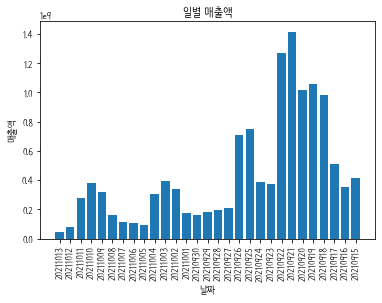

In [75]:
title = '보이스'
temp = df[df['movieNm']==title]
plt.bar(temp['targetDt'],temp['salesAmt'].astype(int))
plt.title('일별 매출액')
plt.xlabel('날짜')
plt.ylabel('매출액')
plt.xticks(fontsize=10,rotation=90)
plt.show()

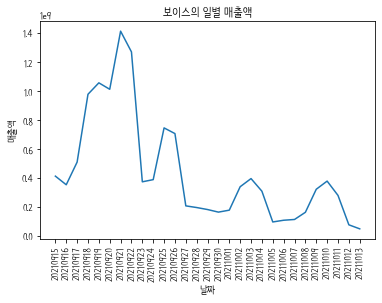

In [76]:
title = '보이스'
temp = df[df['movieNm']==title]
temp1 = temp.sort_values(by=['targetDt'])
plt.plot(temp1['targetDt'],temp1['salesAmt'].astype(int))
plt.title(f'{title}의 일별 매출액')
plt.xlabel('날짜')
plt.ylabel('매출액')
plt.xticks(fontsize=10,rotation=90)
plt.show()

In [96]:
cine = BoxOffice()
cine['salesAmt']=cine['salesAmt'].astype('int64')
temp2 = cine.groupby('movieNm').sum()

In [97]:
temp2['salesAmt'] = temp2['salesAmt'].astype('int64')

In [98]:
temp2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 39 entries, 007 노 타임 투 다이 to 화이트데이: 부서진 결계
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   salesAmt  39 non-null     int64
dtypes: int64(1)
memory usage: 624.0+ bytes


In [99]:
temp2

,salesAmt
movieNm,
007 노 타임 투 다이,10520731500
F20,81934800
건파우더 밀크셰이크,17294680
고양이를 부탁해,3535070
그래비티,124926400
그린 나이트,4624000
극장판 짱구는 못말려: 격돌! 낙서왕국과 얼추 네 명의 용사들,1688210990
"극장판 포켓몬스터: 정글의 아이, 코코",1821400910
기적,5867575020


In [100]:
temp2.index

Index(['007 노 타임 투 다이', 'F20', '건파우더 밀크셰이크', '고양이를 부탁해', '그래비티', '그린 나이트',
       '극장판 짱구는 못말려: 격돌! 낙서왕국과 얼추 네 명의 용사들', '극장판 포켓몬스터: 정글의 아이, 코코', '기적',
       '날씨의 아이', '너의 이름은.', '노회찬6411', '랑종', '레드 아워', '리스펙트', '말리그넌트',
       '매직 스쿨: 초보마법사 아우라의 대모험', '맨 인 더 다크 2', '모가디슈', '베놈 2: 렛 데어 비 카니지',
       '보이스', '쁘띠 마망', '샹치와 텐 링즈의 전설', '수색자', '스틸워터', '싱크홀', '여름날 우리', '올드',
       '용과 주근깨 공주', '인질', '잔나비 판타스틱 올드패션드 리턴즈! x 넌센스 Ⅱ', '정글 크루즈', '캐시트럭',
       '캔디맨', '코다', '콰이어트 플레이스 2', '피어썸', '해리포터와 마법사의 돌', '화이트데이: 부서진 결계'],
      dtype='object', name='movieNm')

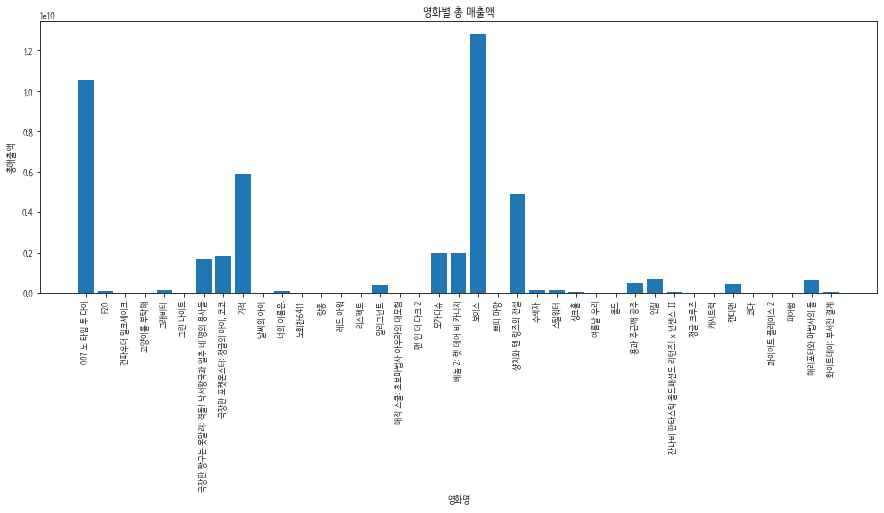

In [101]:
plt.figure(figsize=(15,5))
plt.bar(temp2.index,temp2['salesAmt'])
plt.title('영화별 총 매출액')
plt.xlabel('영화명')
plt.ylabel('총매출액')
plt.xticks(fontsize=9,rotation=90)
plt.show()

In [103]:
cine.groupby('movieNm')['salesAmt'].count()

movieNm
007 노 타임 투 다이                         15
F20                                    4
건파우더 밀크셰이크                             1
고양이를 부탁해                               1
그래비티                                   5
그린 나이트                                 1
극장판 짱구는 못말려: 격돌! 낙서왕국과 얼추 네 명의 용사들    24
극장판 포켓몬스터: 정글의 아이, 코코                 21
기적                                    29
날씨의 아이                                 1
너의 이름은.                                6
노회찬6411                                2
랑종                                     2
레드 아워                                  1
리스펙트                                   1
말리그넌트                                 10
매직 스쿨: 초보마법사 아우라의 대모험                  1
맨 인 더 다크 2                             1
모가디슈                                  28
베놈 2: 렛 데어 비 카니지                       2
보이스                                   29
쁘띠 마망                                  2
샹치와 텐 링즈의 전설                          29
수색자                                    7
스틸워터    